### 환율과 주요 지수의 상관관계
- 유가(wti,브렌트, 두바이)
- 물가(생산자,소비자)
- 금리(미국, 한국)
- 부동산, 국채

In [1]:
# !pip install finance-datareader
# !pip install pandas-datareader

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

In [91]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## 데이터 수집

In [92]:
#0. 환율
# https://fred.stlouisfed.org/series/EXKOUS 월별
# https://fred.stlouisfed.org/series/DEXKOUS 일별
exchange_rate = pdr.DataReader(['EXKOUS'], 'fred', '2000-01-01') 
#1.유가
    #일단위 
    # http://fred.stlouisfed.org/series/DCOILWTICO WTI
    #https://fred.stlouisfed.org/series/DCOILBRENTEU 브렌트유
    
    #월단위
    # https://fred.stlouisfed.org/series/POILWTIUSDM WTI
    # https://fred.stlouisfed.org/series/POILDUBUSDM 두바이
    # https://fred.stlouisfed.org/series/POILBREUSDM 브렌트유
oil_price= pdr.DataReader(['POILWTIUSDM','POILDUBUSDM','POILBREUSDM'], 'fred', '2000-01-01')
oil_price.columns = ['WTI','Dubai','Brent']
#2. 물가
price_rate= pd.read_excel('./물가.xlsx').T
#3. 금리
    # https://fred.stlouisfed.org/series/INTDSRUSM193N 미국금리
    # https://fred.stlouisfed.org/series/INTDSRKRM193N 한국금리
interest_rate = pdr.DataReader(['INTDSRUSM193N','INTDSRKRM193N'],'fred','2000-01-01')
interest_rate.columns = ['US_rate','KR_rate']
#4. 국채,부동산, 주가
bond_estate_stock = pd.read_excel('bond_estate_stock.xlsx').T
    #주택매매가,전세가 -- 2003년 11월부터 


In [93]:
#price, bond 
#columns
bond_estate_stock.columns= ["종합주가지수","주택매매가격지수","주택전세가격지수","국고채(1년)","국고채(5년)","국고채(3년)"]
price_rate.columns = ["소비자물가지수","생산자물가지수","국내공급물가지수(원재료)","생산자물가등락률","소비자물가등락률"]
#drop
bond_estate_stock.drop(["자료구분","항목명1","통계표","단위"], axis=0, inplace= True)
price_rate.drop(["자료구분","항목명1","통계표","단위"], axis=0, inplace= True)

#index
price_rate.index = pd.to_datetime(price_rate.index,format = '%Y-%m-%d')
bond_estate_stock.index = pd.to_datetime(bond_estate_stock.index,format = '%Y-%m-%d')
price_rate.index.name = 'DATE'
bond_estate_stock.index.name = 'DATE'

In [94]:
#테이블합치기
table = pd.concat([exchange_rate,oil_price,price_rate,interest_rate,bond_estate_stock ],axis=1)

In [95]:
table = table.dropna()
table = table.astype('float32')

In [96]:
table.head()

,EXKOUS,WTI,Dubai,Brent,소비자물가지수,생산자물가지수,국내공급물가지수(원재료),생산자물가등락률,소비자물가등락률,US_rate,KR_rate,종합주가지수,주택매매가격지수,주택전세가격지수,국고채(1년),국고채(5년),국고채(3년)
DATE,,,,,,,,,,,,,,,,,
2003-11-01,1186.388916,31.024000,27.504000,28.771999,74.226997,80.099998,52.400002,2.5,3.4,2.0,2.5,789.049988,68.599998,63.200001,4.47,5.08,4.77
2003-12-01,1192.336426,32.178696,27.827391,29.831305,74.560997,80.620003,53.549999,3.1,3.4,2.0,2.5,801.179993,68.099998,62.400002,4.67,5.13,4.87
2004-01-01,1183.344971,34.124092,28.649092,31.143637,75.027000,81.720001,55.270000,3.7,3.4,2.0,2.5,845.530029,67.699997,62.000000,4.60,5.16,4.88
2004-02-01,1167.531616,34.721500,28.398001,30.865999,75.359001,82.739998,55.779999,4.5,3.3,2.0,2.5,867.450012,67.800003,62.099998,4.42,5.13,4.83
2004-03-01,1166.286987,36.731304,30.464783,33.799129,76.091003,83.540001,58.220001,4.5,3.1,2.0,2.5,875.580017,67.900002,62.200001,4.25,4.88,4.58


## Indexing& Scaling

In [97]:
#전년 대비 증감률 ---물가등락률 데이터는 의미 없음
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
table_scaled = scaler.fit_transform(table)
table_scaled = pd.DataFrame(table_scaled, columns= table.columns, index= table.index)
table_indexing= (table-table.shift(12))/table.shift(12)

### 상관분석

In [98]:
print(table.corrwith(table["EXKOUS"]))

EXKOUS           1.000000
WTI             -0.354854
Dubai           -0.265242
Brent           -0.299286
소비자물가지수          0.333182
생산자물가지수          0.318240
국내공급물가지수(원재료)    0.115202
생산자물가등락률        -0.028319
소비자물가등락률        -0.058379
US_rate         -0.682881
KR_rate         -0.499575
종합주가지수           0.010223
주택매매가격지수         0.362840
주택전세가격지수         0.290977
국고채(1년)         -0.494208
국고채(5년)         -0.339413
국고채(3년)         -0.400672
dtype: float64


In [99]:
# plt.figure(figsize= (30,20))
# sns.heatmap(table_indexing.corr(), annot= True, fmt = "0.2g")
# plt.show()

## 시각화

In [100]:
table_indexing.columns

Index(['EXKOUS', 'WTI', 'Dubai', 'Brent', '소비자물가지수', '생산자물가지수',
       '국내공급물가지수(원재료)', '생산자물가등락률', '소비자물가등락률', 'US_rate', 'KR_rate', '종합주가지수',
       '주택매매가격지수', '주택전세가격지수', '국고채(1년)', '국고채(5년)', '국고채(3년)'],
      dtype='object')

### 환율과 유가

<AxesSubplot:label='3df8c30c-db8a-4e2a-869d-4a8a26a8d23c'>

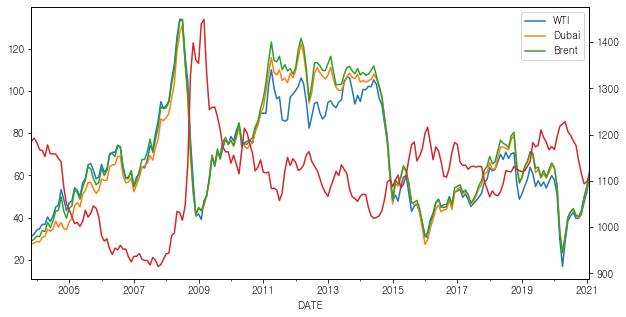

In [101]:
table[["WTI","Dubai","Brent"]].plot(figsize=(10,5))
table["EXKOUS"].plot(figsize=(10,5), secondary_y= True)


환율과 유가는 대체로 반대로 움직이지만, 특정 구간에서는 유가만 급락하는 추세를 보이고 있다. 
1. 2014년 셰일파동
- 미국이 셰일오일 생산단가를 낮추면서 손익분기점을 약 50달러 선으로 맞추게 되자 유류소비량이 제일 높은 미국이 석유생산국이 되었다. 이 때 사우디 아라비아에서 OPEC의 감산 결의안을 무시하고 미국의 셰일기업들을 고사시키기 위해 석유생산량을 급속히 늘렸다. 이로 인해 석유 생산량이 늘어나자 석유값이 폭락하고, 미국의 셰일기업들은 일부 파산했다. 한편, 사우디 아라비아가 셰일기업들을 고사시키고자 유가를 폭락하게 만든 잉을 흔히 '치킨게임'이라는 용어를 가지고 설명한다. 
2. 2020년 코로나
- 코로나로 인해 원유 수요가 부진해지면서 유가가 사상 최저의 수치를 기록했다. 

<AxesSubplot:title={'center':'전년대비 증감률'}, xlabel='DATE'>

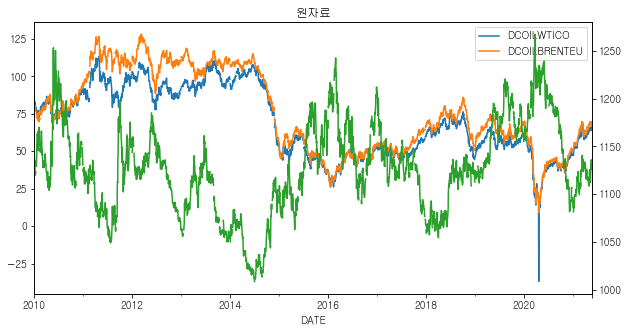

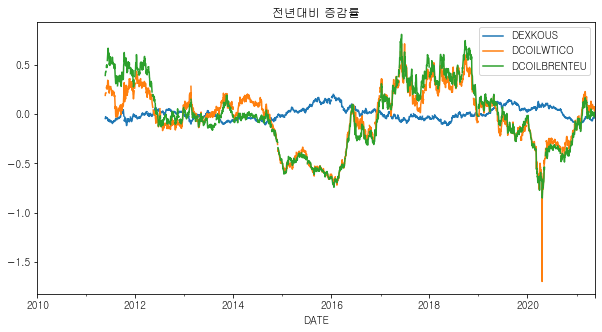

In [102]:
#일별데이터(2014년-)
dexchange_rate_oil = pdr.DataReader(["DEXKOUS","DCOILWTICO","DCOILBRENTEU"], "fred","2010-01-01")

#원자료
dexchange_rate_oil[["DCOILWTICO","DCOILBRENTEU"]].plot(figsize=(10,5), title= "원자료")
dexchange_rate_oil["DEXKOUS"].plot(figsize=(10,5),secondary_y=True)

#전년대비 증감

dexchange_rate_oil_rate = (dexchange_rate_oil-dexchange_rate_oil.shift(360))/dexchange_rate_oil.shift(360)
dexchange_rate_oil_rate.plot(figsize=(10,5), title= "전년대비 증감률")



### 물가- 환율, 유가

<AxesSubplot:label='68b8f50d-4f55-4121-9f0d-85e1364264dd'>

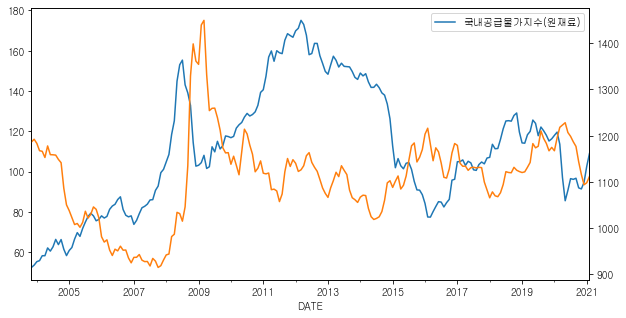

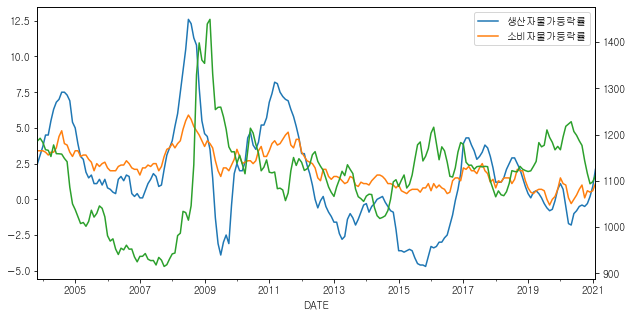

In [103]:
#환율
table[['국내공급물가지수(원재료)']].plot(figsize=(10,5))
table["EXKOUS"].plot(figsize=(10,5), secondary_y= True)

table[['생산자물가등락률','소비자물가등락률']].plot(figsize=(10,5))
table["EXKOUS"].plot(figsize=(10,5), secondary_y= True)


<AxesSubplot:label='7d27cd4d-9d60-48e8-8253-aa2f6b771fbb'>

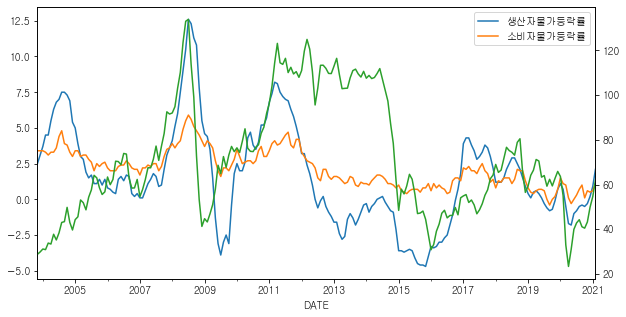

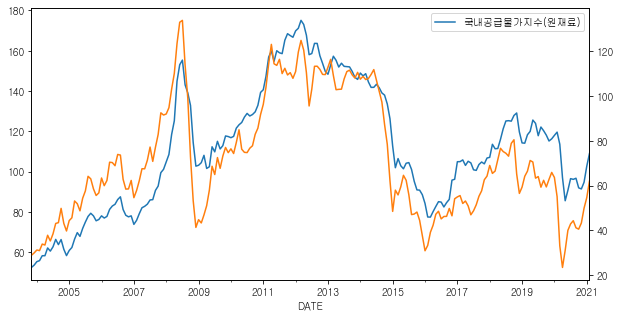

In [104]:
#유가
table[['생산자물가등락률','소비자물가등락률']].plot(figsize=(10,5))
table["Brent"].plot(figsize=(10,5), secondary_y= True)

table[['국내공급물가지수(원재료)']].plot(figsize=(10,5))
table["Brent"].plot(figsize=(10,5), secondary_y= True)


생산자물가는 유가의 흐름에 따라 등락률이 같이 변화하는 추세를 보인다.
특히 원재료의 국내공급물가지수의 경우 유가의 영향을 많이 받기 때문에 유가와 거의 비슷한 추세를 보이고 있다.
- 2004-2005년:  IMF 구제금융 요청 이후 
 - 물가가 여전히 환율의 영향을 많이 받은 때였으므로 이례적으로 유가 대신 환율과 같은 방향으로 움직이고 있다. 

### 환율과 금리

In [105]:
table[['US_rate', 'KR_rate']].corrwith(table["EXKOUS"])

US_rate   -0.682881
KR_rate   -0.499575
dtype: float64

<AxesSubplot:label='5b743e5a-5bac-4184-88dd-843532685677'>

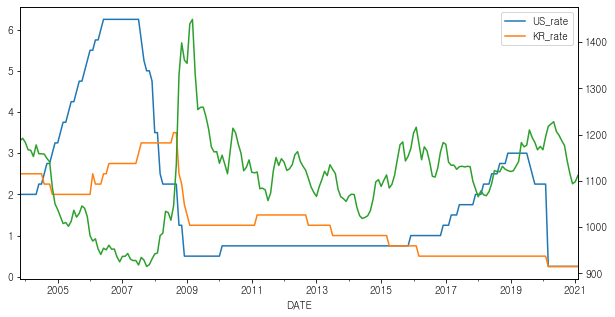

In [106]:
table[['US_rate', 'KR_rate']].plot(figsize=(10,5))
table["EXKOUS"].plot(figsize=(10,5), secondary_y= True)

환율이 오르면 금리는 대체로 내려간다<br><br>

일반적으로 환율이 오르면 달러가 강세이므로 연준에서는 금리를 인하하여 달러의 가치가 다시 내려가게 한다. 한국은행은 원화가치가 평가절상되는 것을 막기 위해 미국의 금리인하에 맞춰 한국의 기준금리를 인하한다 
1. 2004-2006: 금융위기 전 미국 경제 성장
- 이 시기에는 미국이 강한 경제 성장세를 보이면서 금리를 대폭 상승하였다. 그로 인해 달러의 유동성이 증가하면서 달러의 가치는 낮아지고, 환율은 대폭하락했다.
2. 2007-2009: 글로벌 금융위기
- 금융위기가 도래하면서 달러난이 심각해지고 이로 인해 환율이 대폭상승하게 되었다. 연준은 달러의 유동성을 공급하기 위해 기준금리르 대폭인하하고 한국도 그 기조를 따라가는 모습을 보인다. 

3. 2016-2020: 이 시기에 환율은 1000-1200원선을 오르락내리락하는 모습을 보이나 미국의 정책금리는 꾸준히 상승하고 한국의 기준금리는 동결된 양상을 보인다. 미국의 경우 글로벌 금융위기 이후, 경기가 회복되면서 경제활동과 노동시장이 강세를 보여 금리를 꾸준히 인상해왔다. 반면, 한국은 트럼프의 대통령 취임 이후, 자국 무역 보호 정책과 미중 무역 분쟁 속에서 수출이 악화하면서 경기가 악화되는 모습을 보였다. 이로 인해 금리를 인하하려는 압박을 받았으나 미국과의 금리 격차로 인한 환율 폭등을 우려해 기준금리를 동결했다. 

###  환율과 주가
- 상관계수 -0.704487

In [107]:
table[['EXKOUS', 'KR_rate']].corrwith(table["종합주가지수"])

EXKOUS     0.010223
KR_rate   -0.670665
dtype: float64

<AxesSubplot:xlabel='DATE'>

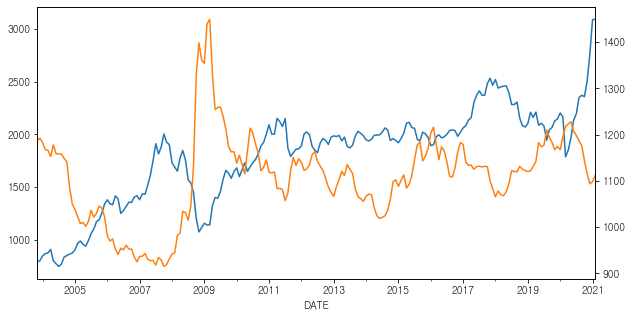

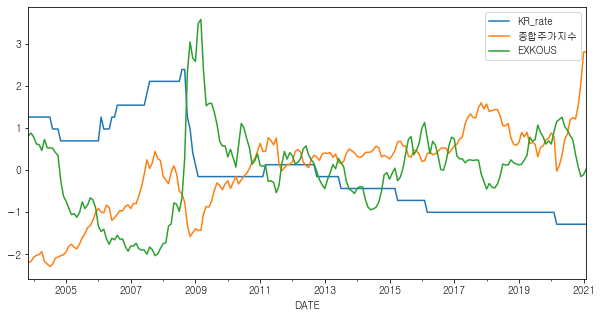

In [108]:
table['종합주가지수'].plot(figsize=(10,5))
table['EXKOUS'].plot(figsize=(10,5),secondary_y =True)

table_scaled[['KR_rate','종합주가지수','EXKOUS']].plot(figsize=(10,5))



그래프를 보면 주가가 환율과 상반되게 움직이고 있다. 일반적인 경제상식으로는 환율이 오르면 금리가 인하하고, 수출이 증가하기 때문에 주가가 오르는 게 정상적이나 한국의 주가에는 환율 외의 요인들의 영향이 큰 것으로 보인다. 


*  2020년- '동학개미운동' 
 -  한편, 최근에는 주가가 치솟는 경향을 보이고 있다. 일반적으로 금리가 인하하면 예금의 수익률이 떨어지기 때문에 상대적으로 수익률이 높은 자산으로 옮겨가기 마련이다. 2020년 코로나 확산으로 인한 경기 침체로 가준금리가 계속 낮게 유지되고 부동산 규제가 시작되면서 수익률이 높은 주식으로 자산이 이동하고, 주식 거래량은 기하급수적으로 증가했다. 
 - '동학개미운동': 2020년 외국인 투자자들의 이탈로 1000대로 떨어진 코스피가 개인 투자자들이 주식시장으로 뛰어들면서 3000선으로 올랐다. 2030세대를 중심으로 주식시장이 활발해지면서 앞으로 한국의 주가 상승의 변수가 달라질 것으로 예상된다.  

### 환율과 국채금리

<AxesSubplot:xlabel='DATE'>

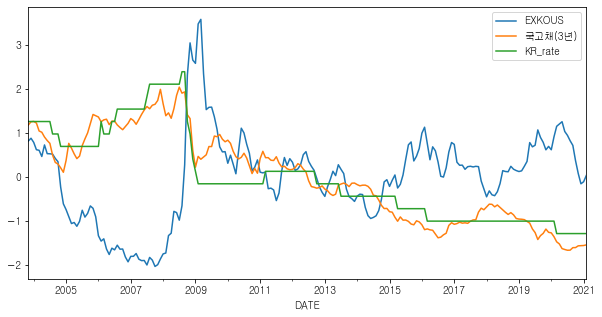

In [109]:
table_scaled[["EXKOUS", '국고채(3년)','KR_rate']].plot(figsize=(10,5))

국채금리(= 국채수익률)

- 일반적으로 국채금리는 기준금리와 비슷한 추세를 보인다. 기준금리가 인상될 때, 통화가치가 올라가기 때문에 국채에 대한 수익률이 높아질 것으로 예상하여 국채금리도 같이 상승한다.
- 반면, 환율은 기준금리와 반대되는 추세를 보이기 때문때 국채금리 역시 환율과 반대되는 방향으로 움직인다. 

### 환율과 주택가격

<AxesSubplot:xlabel='DATE'>

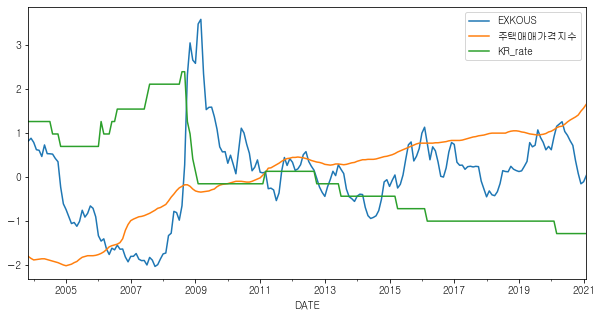

In [110]:
table_scaled[["EXKOUS", '주택매매가격지수','KR_rate']].plot(figsize=(10,5))

한국의 주택가격은 환율과의 상관도가 낮은 것으로 보인다. 